In [2]:
import xarray as xr
import pyet
import numpy as np

import os
import glob

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:

def es(t):
    '''
    Magnus formula (Lawrence, 2005, BAMS, eq 6)
    '''
    A1 = 17.625
    B1 = 243.04
    C1 = 610.94
    e_s = C1 * np.exp( (A1 * t) / (B1 + t) )
    return e_s

def calc_rh(tdew,t2m):
    rh = es(tdew) / es(t2m) * 100
    return rh



In [5]:
static_file = '/perm/nklm/Px_flashdroughts/PET/prep/surf_para_regridded.nc'
gravitational_constant = 9.81


elevation    = xr.open_dataset(static_file)['z']/gravitational_constant
lat1d          = xr.open_dataset(static_file)['latitude']* np.pi / 180
lat2d         = lat1d.expand_dims(dim={"longitude":elevation.longitude}, axis=1)

In [6]:
diri='/scratch/nklm/Px_flashdroughts/PET_data/test_2D/'

tmean =xr.open_dataset(f'{diri}/tas_ydaymean.nc/',engine='netcdf4')["tas"]
tasmin  =xr.open_dataset(f'{diri}/tasmin_ydaymean.nc',engine='netcdf4')["tasmin"]
tasmax  =xr.open_dataset(f'{diri}/tasmax_ydaymean.nc',engine='netcdf4')["tasmax"]
wind  =xr.open_dataset(f'{diri}/sfcWind_ydaymean.nc',engine='netcdf4')["sfcWind"]
rs    =xr.open_dataset(f'{diri}/rsds_ydaymean.nc',engine='netcdf4')["rsds"]  * (86400 / 1000000) /(60*60)
tdew = xr.open_dataset(f'{diri}/tdew_ydaymean.nc',engine='netcdf4')["tdew"]

rh = calc_rh(tdew,tmean)

In [18]:
diri='/scratch/nklm/Px_flashdroughts/PET_data/test_2D/'

tmean =xr.open_dataset(f'{diri}/tas.nc/',engine='netcdf4')["tas"].resample(time="1D").mean()
tasmin  =xr.open_dataset(f'{diri}/tasmin.nc',engine='netcdf4')["tasmin"].resample(time="1D").min()
tasmax  =xr.open_dataset(f'{diri}/tasmax.nc',engine='netcdf4')["tasmax"].resample(time="1D").max()
wind  =xr.open_dataset(f'{diri}/sfcWind.nc',engine='netcdf4')["sfcWind"].resample(time="1D").mean()
rs    =xr.open_dataset(f'{diri}/rsds.nc',engine='netcdf4')["rsds"].resample(time="1D").mean()  * (86400 / 1000000) /(60*60)
tdew = xr.open_dataset(f'{diri}/tdew.nc',engine='netcdf4')["tdew"].resample(time="1D").mean()

rh = calc_rh(tdew,tmean)

In [19]:
rs.time

<xarray.DataArray 'time' (time: 365)>
array(['2022-01-01T00:00:00.000000000', '2022-01-02T00:00:00.000000000',
       '2022-01-03T00:00:00.000000000', ..., '2022-12-29T00:00:00.000000000',
       '2022-12-30T00:00:00.000000000', '2022-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-12-31

In [20]:
pet_pm_asce = pyet.pm_asce(tmean, wind, rs=rs, elevation=elevation, lat=lat2d, tmax=tasmax, tmin=tasmin, rh=rh.data)


<xarray.DataArray 'time' (time: 365)>
array(['2022-01-01T00:00:00.000000000', '2022-01-02T00:00:00.000000000',
       '2022-01-03T00:00:00.000000000', ..., '2022-12-29T00:00:00.000000000',
       '2022-12-30T00:00:00.000000000', '2022-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-12-31


/perm/nklm/mambaforge/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: invalid value encountered in arccos
  result_data = func(*input_data)


ValueError: Dimension time already exists.

In [43]:
# pet_pm_asce = pyet.pm_asce(
#     tmean.resample(time="1D").mean(), 
#     wind.resample(time="1D").mean(), 
#     rs=rs_new,
#     elevation=elevation, 
#     lat=lat2d, 
#     tmax=tasmax.resample(time="1D").mean(), 
#     tmin=tasmin.resample(time="1D").mean(), 
#     rh=rh.data)

In [8]:
rs

<xarray.DataArray 'rsds' (time: 365, latitude: 153, longitude: 225)>
array([[[-3.60000013e-05, -3.60000013e-05, -3.60000013e-05, ...,
         -3.60000013e-05, -3.60000013e-05, -3.60000013e-05],
        [-3.60000013e-05, -3.60000013e-05, -3.60000013e-05, ...,
         -3.60000013e-05, -3.60000013e-05, -3.60000013e-05],
        [-3.60000013e-05, -3.60000013e-05, -3.60000013e-05, ...,
         -3.60000013e-05, -3.60000013e-05, -3.60000013e-05],
        ...,
        [ 1.10926323e+01,  1.11190386e+01,  1.11398878e+01, ...,
          1.11760235e+01,  1.10439844e+01,  1.08243847e+01],
        [ 1.12218904e+01,  1.12260599e+01,  1.12316189e+01, ...,
          1.10634422e+01,  1.09814396e+01,  1.08104849e+01],
        [ 1.13428116e+01,  1.13358603e+01,  1.13428116e+01, ...,
          1.08174334e+01,  1.06534271e+01,  1.05116577e+01]],

       [[-3.60000013e-05, -3.60000013e-05, -3.60000013e-05, ...,
         -3.60000013e-05, -3.60000013e-05, -3.60000013e-05],
        [-3.60000013e-05, -3.60000013e-05, -3.60000013e-05, ...,
         -3.60000013e-05, -3.60000013e-05, -3.60000013e-05],
        [-3.60000013e-05, -3.60000013e-05, -3.60000013e-05, ...,
         -3.60000013e-05, -3.60000013e-05, -3.60000013e-05],
...
          7.87643719e+00,  7.97234106e+00,  7.98068142e+00],
        [ 1.17208595e+01,  1.17361469e+01,  1.17500467e+01, ...,
          8.98417568e+00,  8.91329098e+00,  8.88688564e+00],
        [ 1.18417807e+01,  1.18542871e+01,  1.18667965e+01, ...,
          9.75417328e+00,  9.60267544e+00,  9.54152107e+00]],

       [[-3.60000013e-05, -3.60000013e-05, -3.60000013e-05, ...,
         -3.60000013e-05, -3.60000013e-05, -3.60000013e-05],
        [-3.60000013e-05, -3.60000013e-05, -3.60000013e-05, ...,
         -3.60000013e-05, -3.60000013e-05, -3.60000013e-05],
        [-3.60000013e-05, -3.60000013e-05, -3.60000013e-05, ...,
         -3.60000013e-05, -3.60000013e-05, -3.60000013e-05],
        ...,
        [ 1.03712826e+01,  1.05213881e+01,  1.06548185e+01, ...,
          7.28295898e+00,  7.39414835e+00,  7.37747145e+00],
        [ 1.07660065e+01,  1.08702488e+01,  1.09188967e+01, ...,
          8.31286240e+00,  8.51578522e+00,  8.56999207e+00],
        [ 1.10787334e+01,  1.11398878e+01,  1.11440582e+01, ...,
          9.07312870e+00,  9.34137630e+00,  9.48314476e+00]]],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2022-01-01T23:00:00 ... 2022-12-31T23:00:00
  * longitude  (longitude) float32 -15.0 -14.75 -14.5 -14.25 ... 40.5 40.75 41.0
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 34.5 34.25 34.0

In [11]:
testindex = pd.DatetimeIndex(rs.time)

In [13]:
testindex


DatetimeIndex(['2022-01-01 23:00:00', '2022-01-02 23:00:00',
               '2022-01-03 23:00:00', '2022-01-04 23:00:00',
               '2022-01-05 23:00:00', '2022-01-06 23:00:00',
               '2022-01-07 23:00:00', '2022-01-08 23:00:00',
               '2022-01-09 23:00:00', '2022-01-10 23:00:00',
               ...
               '2022-12-22 23:00:00', '2022-12-23 23:00:00',
               '2022-12-24 23:00:00', '2022-12-25 23:00:00',
               '2022-12-26 23:00:00', '2022-12-27 23:00:00',
               '2022-12-28 23:00:00', '2022-12-29 23:00:00',
               '2022-12-30 23:00:00', '2022-12-31 23:00:00'],
              dtype='datetime64[ns]', length=365, freq=None)

In [21]:
rs_new = rs.resample(time="1D").mean()

In [17]:
wind.time

<xarray.DataArray 'time' (time: 366)>
array(['2022-01-01T23:00:00.000000000', '2022-01-02T23:00:00.000000000',
       '2022-01-03T23:00:00.000000000', ..., '2022-12-29T23:00:00.000000000',
       '2022-12-30T23:00:00.000000000', '2022-12-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01T23:00:00 ... 2022-12-31T23:00:00
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T

In [19]:
# dit is voorbeeld2 uit de git...
# dat werkt, ongeveer

In [15]:
xr_ds = xr.open_dataset("~/Px_drought/pyet/examples/data/example_2/incal_hourly_20120501T0000_20120930T2300.nc", 
            engine="netcdf4")

In [16]:
xr_ds

<xarray.Dataset>
Dimensions:                  (time: 3672, y: 17, x: 20)
Coordinates:
    lat                      (y, x) float32 ...
  * y                        (y) int32 344000 345000 346000 ... 359000 360000
    lon                      (y, x) float32 ...
    lambert_conformal_conic  float64 ...
  * x                        (x) int32 549000 550000 551000 ... 567000 568000
  * time                     (time) datetime64[ns] 2012-05-01 ... 2012-09-30T...
Data variables:
    GL                       (time, y, x) float64 ...
    P0                       (time, y, x) float64 ...
    RH2M                     (time, y, x) float32 ...
    T2M                      (time, y, x) float32 ...
    UU                       (time, y, x) float32 ...
    VV                       (time, y, x) float32 ...
Attributes: (12/14)
    Conventions:         CF-1.7
    author:              Alexander Kann (alexander.kann@zamg.ac.at), Benedikt...
    comment:             No additional comments
    crs:                 EPSG:31287
    freq:                1H
    grid_mapping:        lambert_conformal_conic
    ...                  ...
    name:                incal-hourly
    references:          https://www.zamg.ac.at/cms/de/forschung/wetter/inca ...
    source:              modeled data
    spatial_domain:      INCAL
    spatial_resolution:  1000
    title:               INCA analysis - large domain

In [17]:
tmean_vb = xr_ds["T2M"].resample(time="1D").mean()

In [20]:
tmean_vb.time

<xarray.DataArray 'time' (time: 153)>
array(['2012-05-01T00:00:00.000000000', '2012-05-02T00:00:00.000000000',
       '2012-05-03T00:00:00.000000000', '2012-05-04T00:00:00.000000000',
       '2012-05-05T00:00:00.000000000', '2012-05-06T00:00:00.000000000',
       '2012-05-07T00:00:00.000000000', '2012-05-08T00:00:00.000000000',
       '2012-05-09T00:00:00.000000000', '2012-05-10T00:00:00.000000000',
       '2012-05-11T00:00:00.000000000', '2012-05-12T00:00:00.000000000',
       '2012-05-13T00:00:00.000000000', '2012-05-14T00:00:00.000000000',
       '2012-05-15T00:00:00.000000000', '2012-05-16T00:00:00.000000000',
       '2012-05-17T00:00:00.000000000', '2012-05-18T00:00:00.000000000',
       '2012-05-19T00:00:00.000000000', '2012-05-20T00:00:00.000000000',
       '2012-05-21T00:00:00.000000000', '2012-05-22T00:00:00.000000000',
       '2012-05-23T00:00:00.000000000', '2012-05-24T00:00:00.000000000',
       '2012-05-25T00:00:00.000000000', '2012-05-26T00:00:00.000000000',
       '2012-05-27T00:00:00.000000000', '2012-05-28T00:00:00.000000000',
       '2012-05-29T00:00:00.000000000', '2012-05-30T00:00:00.000000000',
       '2012-05-31T00:00:00.000000000', '2012-06-01T00:00:00.000000000',
       '2012-06-02T00:00:00.000000000', '2012-06-03T00:00:00.000000000',
       '2012-06-04T00:00:00.000000000', '2012-06-05T00:00:00.000000000',
       '2012-06-06T00:00:00.000000000', '2012-06-07T00:00:00.000000000',
       '2012-06-08T00:00:00.000000000', '2012-06-09T00:00:00.000000000',
       '2012-06-10T00:00:00.000000000', '2012-06-11T00:00:00.000000000',
       '2012-06-12T00:00:00.000000000', '2012-06-13T00:00:00.000000000',
       '2012-06-14T00:00:00.000000000', '2012-06-15T00:00:00.000000000',
       '2012-06-16T00:00:00.000000000', '2012-06-17T00:00:00.000000000',
       '2012-06-18T00:00:00.000000000', '2012-06-19T00:00:00.000000000',
       '2012-06-20T00:00:00.000000000', '2012-06-21T00:00:00.000000000',
       '2012-06-22T00:00:00.000000000', '2012-06-23T00:00:00.000000000',
       '2012-06-24T00:00:00.000000000', '2012-06-25T00:00:00.000000000',
       '2012-06-26T00:00:00.000000000', '2012-06-27T00:00:00.000000000',
       '2012-06-28T00:00:00.000000000', '2012-06-29T00:00:00.000000000',
       '2012-06-30T00:00:00.000000000', '2012-07-01T00:00:00.000000000',
       '2012-07-02T00:00:00.000000000', '2012-07-03T00:00:00.000000000',
       '2012-07-04T00:00:00.000000000', '2012-07-05T00:00:00.000000000',
       '2012-07-06T00:00:00.000000000', '2012-07-07T00:00:00.000000000',
       '2012-07-08T00:00:00.000000000', '2012-07-09T00:00:00.000000000',
       '2012-07-10T00:00:00.000000000', '2012-07-11T00:00:00.000000000',
       '2012-07-12T00:00:00.000000000', '2012-07-13T00:00:00.000000000',
       '2012-07-14T00:00:00.000000000', '2012-07-15T00:00:00.000000000',
       '2012-07-16T00:00:00.000000000', '2012-07-17T00:00:00.000000000',
       '2012-07-18T00:00:00.000000000', '2012-07-19T00:00:00.000000000',
       '2012-07-20T00:00:00.000000000', '2012-07-21T00:00:00.000000000',
       '2012-07-22T00:00:00.000000000', '2012-07-23T00:00:00.000000000',
       '2012-07-24T00:00:00.000000000', '2012-07-25T00:00:00.000000000',
       '2012-07-26T00:00:00.000000000', '2012-07-27T00:00:00.000000000',
       '2012-07-28T00:00:00.000000000', '2012-07-29T00:00:00.000000000',
       '2012-07-30T00:00:00.000000000', '2012-07-31T00:00:00.000000000',
       '2012-08-01T00:00:00.000000000', '2012-08-02T00:00:00.000000000',
       '2012-08-03T00:00:00.000000000', '2012-08-04T00:00:00.000000000',
       '2012-08-05T00:00:00.000000000', '2012-08-06T00:00:00.000000000',
       '2012-08-07T00:00:00.000000000', '2012-08-08T00:00:00.000000000',
       '2012-08-09T00:00:00.000000000', '2012-08-10T00:00:00.000000000',
       '2012-08-11T00:00:00.000000000', '2012-08-12T00:00:00.000000000',
       '2012-08-13T00:00:00.000000000', '2012-08-14T00:00:00.000000000',
       '2012-08-15T00:00:00.000000000', '2012-08-16T00:00:00.000000000',
       '2012-08-17T0

In [34]:
# Resample and define input meteorological variables
ex_tmean = xr_ds["T2M"].resample(time="1D").mean()
ex_tmax = xr_ds["T2M"].resample(time="1D").max()
ex_tmin = xr_ds["T2M"].resample(time="1D").min()
ex_rh = xr_ds["RH2M"].resample(time="1D").mean()
ex_rhmax = xr_ds["RH2M"].resample(time="1D").max()
ex_rhmin = xr_ds["RH2M"].resample(time="1D").min()
ex_wind = ((np.abs(xr_ds["VV"]) + xr_ds["UU"]) / 2).resample(time="1D").mean()
ex_rs = xr_ds["GL"].resample(time="1D").mean() * 86400 / 1000000

In [35]:
# Define latitude and elevation
ex_lat =  ex_tmean.lat * np.pi / 180  
ex_elevation = ex_lat / ex_lat * 350

In [36]:
ex_pet_penman = pyet.penman(
    ex_tmean, 
    ex_wind, 
    rs=ex_rs, 
    elevation=ex_elevation, 
    lat=ex_lat, 
    tmax=ex_tmax, 
    tmin=ex_tmin, 
    rh=ex_rh)

<xarray.DataArray 'time' (time: 153)>
array(['2012-05-01T00:00:00.000000000', '2012-05-02T00:00:00.000000000',
       '2012-05-03T00:00:00.000000000', '2012-05-04T00:00:00.000000000',
       '2012-05-05T00:00:00.000000000', '2012-05-06T00:00:00.000000000',
       '2012-05-07T00:00:00.000000000', '2012-05-08T00:00:00.000000000',
       '2012-05-09T00:00:00.000000000', '2012-05-10T00:00:00.000000000',
       '2012-05-11T00:00:00.000000000', '2012-05-12T00:00:00.000000000',
       '2012-05-13T00:00:00.000000000', '2012-05-14T00:00:00.000000000',
       '2012-05-15T00:00:00.000000000', '2012-05-16T00:00:00.000000000',
       '2012-05-17T00:00:00.000000000', '2012-05-18T00:00:00.000000000',
       '2012-05-19T00:00:00.000000000', '2012-05-20T00:00:00.000000000',
       '2012-05-21T00:00:00.000000000', '2012-05-22T00:00:00.000000000',
       '2012-05-23T00:00:00.000000000', '2012-05-24T00:00:00.000000000',
       '2012-05-25T00:00:00.000000000', '2012-05-26T00:00:00.000000000',
       '2012-

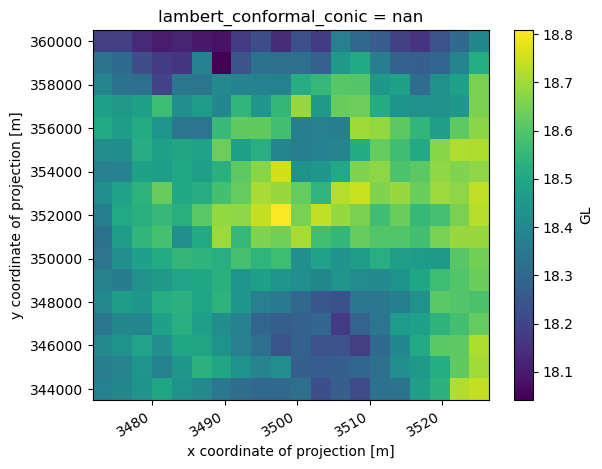

In [42]:
ex_rs.mean(dim=['x','y']).plot()
ex_rs.mean(dim=['time']).plot()